In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

#####   removing specific columns and dropping columns with a high percentage of missing values.

In [17]:
df=pd.read_csv('AmesHousing.csv')
columns_to_drop = ['Order','Garage Cond', 'Central Air','Utilities','Lot Shape','PID', 'Land Slope','Condition 2','Overall Qual','Exterior 2nd','Exter Qual','Bsmt Exposure','BsmtFin Type 2', 'BsmtFin SF 2','Fireplaces', 'Fireplace Qu','Garage Yr Blt', 'Garage Finish', 'Garage Cars','Paved Drive',
                   'Pool QC','Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type','Sale Condition','Year Remod/Add',"Alley"]
df = df.drop(columns=columns_to_drop)
nan_mean = df.isna().mean() * 100
columns_to_drop = nan_mean[nan_mean >= 90].index
df = df.drop(columns=columns_to_drop)
#________________________________________________
threshold = int(0.95 * len(df.columns))
df = df.dropna(thresh=threshold)
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Bldg Type,...,Garage Area,Garage Qual,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,SalePrice
0,20,RL,141.0,31770,Pave,Lvl,Corner,NAmes,Norm,1Fam,...,528.0,TA,210,62,0,0,0,0,NaN,215000
1,20,RH,80.0,11622,Pave,Lvl,Inside,NAmes,Feedr,1Fam,...,730.0,TA,140,0,0,0,120,0,MnPrv,105000
2,20,RL,81.0,14267,Pave,Lvl,Corner,NAmes,Norm,1Fam,...,312.0,TA,393,36,0,0,0,0,NaN,172000
3,20,RL,93.0,11160,Pave,Lvl,Corner,NAmes,Norm,1Fam,...,522.0,TA,0,0,0,0,0,0,NaN,244000
4,60,RL,74.0,13830,Pave,Lvl,Inside,Gilbert,Norm,1Fam,...,482.0,TA,212,34,0,0,0,0,MnPrv,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,Pave,Lvl,CulDSac,Mitchel,Norm,1Fam,...,588.0,TA,120,0,0,0,0,0,GdPrv,142500
2926,20,RL,NaN,8885,Pave,Low,Inside,Mitchel,Norm,1Fam,...,484.0,TA,164,0,0,0,0,0,MnPrv,131000
2927,85,RL,62.0,10441,Pave,Lvl,Inside,Mitchel,Norm,1Fam,...,0.0,NaN,80,32,0,0,0,0,MnPrv,132000
2928,20,RL,77.0,10010,Pave,Lvl,Inside,Mitchel,Norm,1Fam,...,418.0,TA,240,38,0,0,0,0,NaN,170000


##### handle missing values

In [18]:
nan_data=['Lot Frontage','Mas Vnr Area','Bsmt Unf SF','Bsmt Full Bath','Full Bath',
       'Half Bath','Bedroom AbvGr','Kitchen AbvGr','Lot Frontage','Garage Area']
for j in nan_data:
    df[j] = df[j].fillna(0)
df.loc[df['BsmtFin Type 1'] == 0, 'BsmtFin SF 1'] = 0
df.loc[df['Garage Type'] == 0, 'Garage Area'] = 0

mean_list=['Total Bsmt SF']
for m in mean_list:
    mean_value = df[m].mean()
    df[m] = df[m].fillna(mean_value)
abouve_list = ['Electrical','Bsmt Half Bath']
for i in abouve_list:
    df[i] =df[i].fillna(method='ffill')

In [19]:
encoding_list=['Heating','Street','Garage Qual','MS Zoning', 'Land Contour','Lot Config', 'Neighborhood','Condition 1', 'Bldg Type', 'House Style', 'Roof Style',
               'Roof Matl','Exterior 1st','Mas Vnr Type', 'Exter Cond', 'Foundation', 'Bsmt Qual','Bsmt Cond', 'BsmtFin Type 1', 'Heating QC', 'Electrical','Kitchen Qual','Functional', 'Garage Type', 'Fence']
for l in encoding_list:
    encoder = OrdinalEncoder()
    encoded_values = encoder.fit_transform(df[[l]])
    df[l] = encoded_values
    imputer = SimpleImputer(strategy='constant', fill_value=-1)
    df[l] = imputer.fit_transform(df[[l]])

In [20]:
df.drop(df[df.loc[:,'Lot Frontage']>150].index,axis=0,inplace=True)
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Land Contour,Lot Config,Neighborhood,Condition 1,Bldg Type,...,Garage Area,Garage Qual,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,SalePrice
0,20,4.0,141.0,31770,1.0,3.0,0.0,15.0,2.0,0.0,...,528.0,4.0,210,62,0,0,0,0,-1.0,215000
1,20,3.0,80.0,11622,1.0,3.0,4.0,15.0,1.0,0.0,...,730.0,4.0,140,0,0,0,120,0,2.0,105000
2,20,4.0,81.0,14267,1.0,3.0,0.0,15.0,2.0,0.0,...,312.0,4.0,393,36,0,0,0,0,-1.0,172000
3,20,4.0,93.0,11160,1.0,3.0,0.0,15.0,2.0,0.0,...,522.0,4.0,0,0,0,0,0,0,-1.0,244000
4,60,4.0,74.0,13830,1.0,3.0,4.0,8.0,2.0,0.0,...,482.0,4.0,212,34,0,0,0,0,2.0,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,4.0,37.0,7937,1.0,3.0,1.0,14.0,2.0,0.0,...,588.0,4.0,120,0,0,0,0,0,0.0,142500
2926,20,4.0,0.0,8885,1.0,2.0,4.0,14.0,2.0,0.0,...,484.0,4.0,164,0,0,0,0,0,2.0,131000
2927,85,4.0,62.0,10441,1.0,3.0,4.0,14.0,2.0,0.0,...,0.0,-1.0,80,32,0,0,0,0,2.0,132000
2928,20,4.0,77.0,10010,1.0,3.0,4.0,14.0,2.0,0.0,...,418.0,4.0,240,38,0,0,0,0,-1.0,170000


##### performing feature selection by calculating mutual information scores for each feature in a regression task 

In [21]:
from sklearn.feature_selection import mutual_info_regression
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores[:10]

Neighborhood     0.552742
Gr Liv Area      0.501354
Garage Area      0.406512
Year Built       0.405391
1st Flr SF       0.378865
Total Bsmt SF    0.377288
Bsmt Qual        0.371833
Kitchen Qual     0.329442
MS SubClass      0.279829
Full Bath        0.264541
Name: MI Scores, dtype: float64

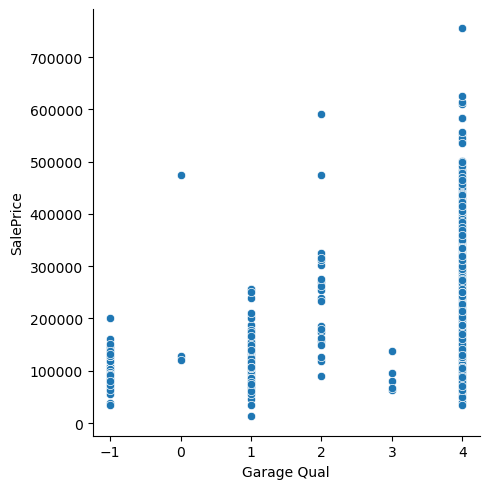

In [15]:
sns.relplot(x="Garage Qual", y="SalePrice", data=df);

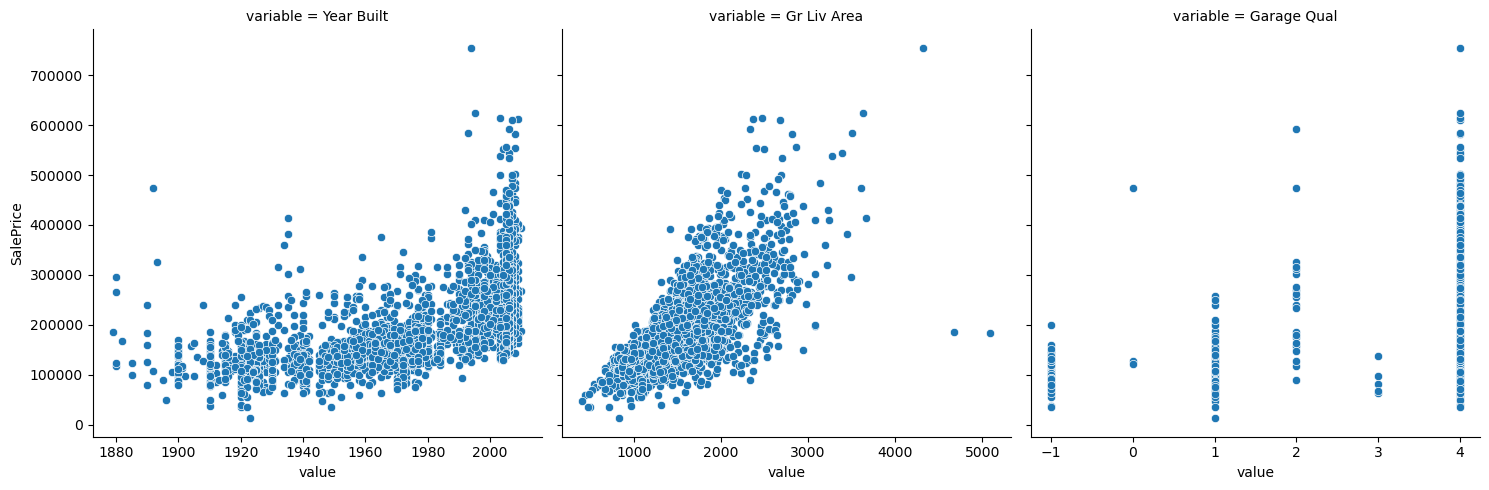

In [8]:
features = ["Year Built", "Gr Liv Area", "Garage Qual"]
sns.relplot(
    x="value",
    y="SalePrice",
    col="variable",
    data=df.melt(id_vars="SalePrice", value_vars=features),
    facet_kws={"sharex": False}
)

#####  LinearRegression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
#scaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=59)
#scaled_X_train = scaler.fit_transform(X_train)
#scaled_X_test = scaler.transform(X_test)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r4 = r2_score(y_pred,y_test)
print(lr.intercept_,lr.coef_)

-891289.1097267943 [-3.29067389e+01 -5.08294765e+02  7.83159979e+01  4.67968391e-01
  3.10567992e+04 -2.60050367e+03 -1.79431455e+02  1.95218964e+02
  1.41921775e+02 -1.14119848e+03  5.26221879e+00  8.59824838e+03
  4.44810555e+02  3.84925564e+03  2.52391725e+03  5.99716746e+01
  5.36780841e+02  3.00607178e+01  1.98465152e+03  5.63279513e+02
 -7.29243262e+03  1.64659882e+02  6.68725359e+02  6.80645545e+00
 -9.80470320e+00  4.19876464e+01 -1.78248864e+03 -1.76524147e+03
  2.54235585e+02  1.81743769e+01  2.57607574e+01 -5.82898319e+00
  3.81061510e+01  4.63555885e+03 -6.64535184e+03  8.36393052e+02
 -3.73243620e+01 -8.05196798e+03 -3.37001646e+04 -7.93822842e+03
  3.17114232e+03  4.09723974e+03  3.73298240e+02  4.27501112e+01
 -1.61119998e+03  1.17995836e+01 -2.61483569e+01  2.35847886e+01
 -1.22433709e+01  4.92838758e+01  2.54034902e+01 -5.62448121e+02]


In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MSE=mean_squared_error(y_pred,y_test)
RMSE=np.sqrt(MSE)
MAE=mean_absolute_error(y_pred,y_test)
1-RMSE/y_test.mean(),MAE

(0.8684501534682542, 18005.18519933774)

##### ElasticNet

In [32]:
from sklearn.linear_model import ElasticNet
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet(alpha=269.5,l1_ratio=1)
elastic_model.fit(scaled_X_train,y_train)
elastic_test_predictions = elastic_model.predict(scaled_X_test)
MAE = mean_absolute_error(y_test,elastic_test_predictions)
MSE = mean_squared_error(y_test,elastic_test_predictions)
RMSE = np.sqrt(MSE)
1 - RMSE / y_test.mean(),MAE

(0.8647232542074612, 18489.06574820815)

In [28]:
from sklearn.linear_model import ElasticNetCV
elastic_model = ElasticNetCV(l1_ratio=np.linspace(0.01 , 1 , 100),alphas=np.linspace(90 , 400 ,500),tol=0.01)
elastic_model.fit(X_train,y_train)
elastic_model.l1_ratio_,elastic_model.alpha_

(1.0, 269.5390781563126)

##### RandomForestRegressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=300,max_depth=20,max_features='auto',min_samples_leaf=1,min_samples_split=5)
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=59)
vr = model.fit(X_train, y_train)
v_pred = model.predict(X_test)
MAE = mean_absolute_error(y_test,v_pred)
MSE = mean_squared_error(y_test,v_pred)
RMSE = np.sqrt(MSE)
1 - MAE / y_test.mean(),MAE

(0.9172171871326529, 15180.578497531797)

In [ ]:
param_grid_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,param_grid=param_grid_forest,cv=5, n_jobs=-1)
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

#####  XGBRegressor

In [34]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [35]:
model=XGBRegressor(n_estimators=500,max_depth=4,learning_rate=0.05)
model.fit(X_train,y_train)
XG_predict=model.predict(X_test)
mean_absolute_error(XG_predict,y_test),1 - MAE / y_test.mean()

(13721.099351820056, 0.9172171871326529)